In [1]:
from importlib import reload
import time
import joblib
from pylab import *
from tqdm import tqdm


import sys
sys.path.append("..")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt
import helper_visa as vs
reload(vs)
import config


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [59]:
path = config.scope
filename = config.scope+"coincidence_preamp_v5/14_LED_calib_-0.4V.joblib"


data_save=joblib.load(filename)
time_series = data_save["metadata"]["time_series"]*1e9
data = data_save[1]


(-10.0, 100.0)

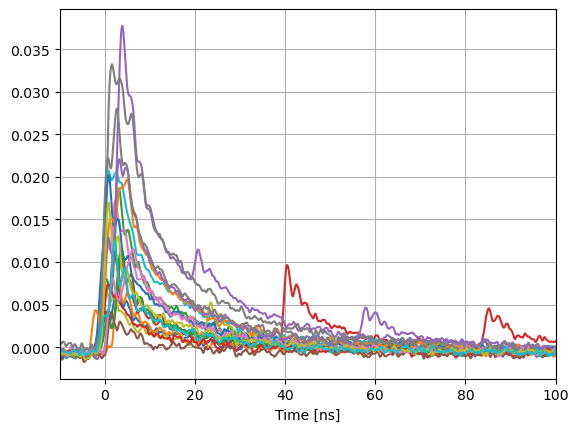

In [60]:
# Have a look at one pulse
for i in range(20):
    plot(time_series, data[i])
grid()
xlabel("Time [ns]")
xlim(-10,100)

In [61]:
integral = []
amplitude = []
for i in range(len(data)):
    trace = data[i]
    trace_temp = trace -np.mean(trace[time_series<-10])
    integral.append(sum(trace_temp[(time_series>-10) & (time_series<100)]))
    amplitude.append(max(trace_temp))

integral=np.array(integral)
amplitude=np.array(amplitude)


In [75]:
reload(hp)

<module 'helper_basic' from '/home/mathusla/tofpet/Mu-Hardware/SystemCharacterization/../helper_basic.py'>

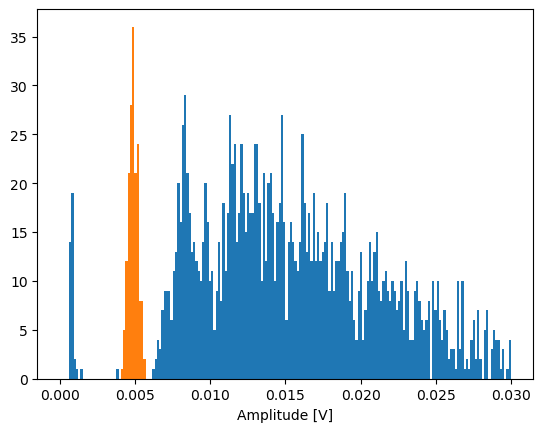

0.7617383


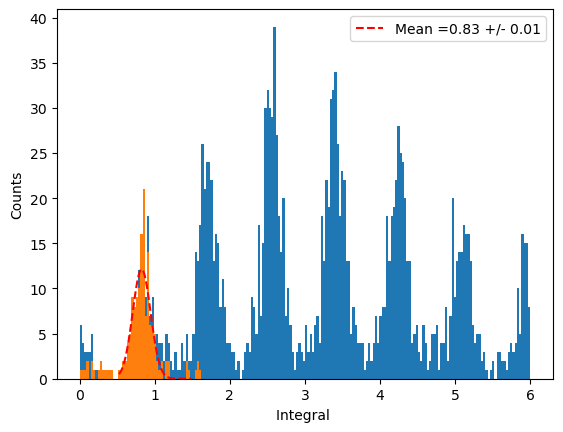

0.8259460763988253


In [82]:
mask_amp = (amplitude>0.004)&(amplitude<0.006)

hist(amplitude,bins=200, range=(0,0.03));
hist(amplitude[mask_amp],bins=200, range=(0,0.03));
xlabel("Amplitude [V]")
show()



hist(integral,bins=200, range=(0,6));
h=hist(integral[mask_amp],bins=200, range=(0,6));
popt, pcov, info, f = hp.fit_hist("gauss", h, fit_range=(0.5,1.5), label="Mean ={popt[1]:.2f} +/- {np.sqrt(pcov[1,1]):.2f}", color="r", linestyle="--");



print(np.mean(integral[mask]))
xlabel("Integral ")
ylabel("Counts")
legend()
# axvline(30,color="r")
savefig(config.scope+"plots/LED_calib_first_peak.jpg")
show()

integral_to_charge = popt[1]
print(integral_to_charge)


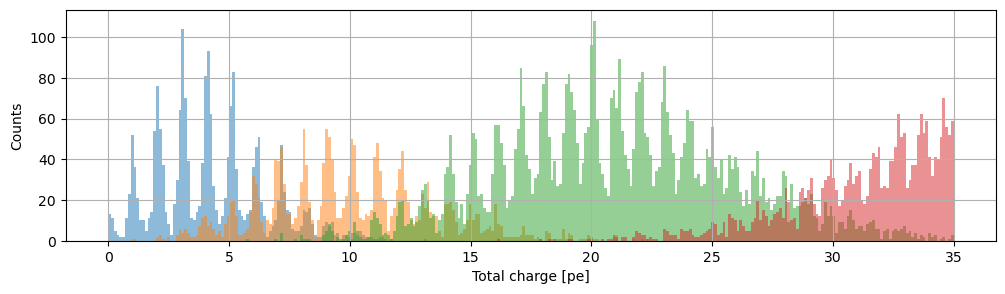

In [88]:
filenames = ["14_LED_calib_-0.4V", "14_LED_calib_-0.3V", "14_LED_calib_-0.2V", "14_LED_calib_-0.1V"]

figure(figsize=(12,3))

for file in filenames:
    filename = config.scope+f"coincidence_preamp_v5/{file}.joblib"


    data_save=joblib.load(filename)
    time_series = data_save["metadata"]["time_series"]*1e9
    data = data_save[1]


    integral = []
    amplitude = []
    for i in range(len(data)):
        trace = data[i]
        trace_temp = trace -np.mean(trace[time_series<-10])
        integral.append(sum(trace_temp[(time_series>-10) & (time_series<100)]))
        amplitude.append(max(trace_temp))

    integral=np.array(integral)
    amplitude=np.array(amplitude)


    hist(integral/integral_to_charge,bins=300, range=(0,35), alpha=0.5);


grid()
ylabel("Counts")
xlabel("Total charge [pe]")
savefig(config.scope+"plots/LED_calib_all_spectrum.jpg")
show()

